<a href="https://colab.research.google.com/github/yuvrajsingh2428/McDonald-s-case-study/blob/main/Mcdonald's%20case%20study%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/drive/MyDrive/dataset/mcdonalds.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.shape

(1453, 15)

In [8]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
mdx = data.iloc[:, 0:11].values

# Convert "Yes" to 1 and everything else to 0
mdx = (mdx == "Yes").astype(int)

# Calculate the column means and round to 2 decimal place
col_means = np.round(mdx.mean(axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [10]:
from sklearn.decomposition import PCA

# Assuming you have a numpy array mdx as defined in the previous answer
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(mdx)

# Print the summary
print("Proportion of Variance Explained:")
print(np.round(pca.explained_variance_ratio_, 2))
print("\nPrincipal Components:")
print(np.round(pca.components_, 2))

Proportion of Variance Explained:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Principal Components:
[[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29]
 [ 0.05 -0.54  0.14  0.25  0.    0.34 -0.49  0.02 -0.49  0.16 -0.04]]


In [11]:
np.set_printoptions(precision=1, suppress=True)
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


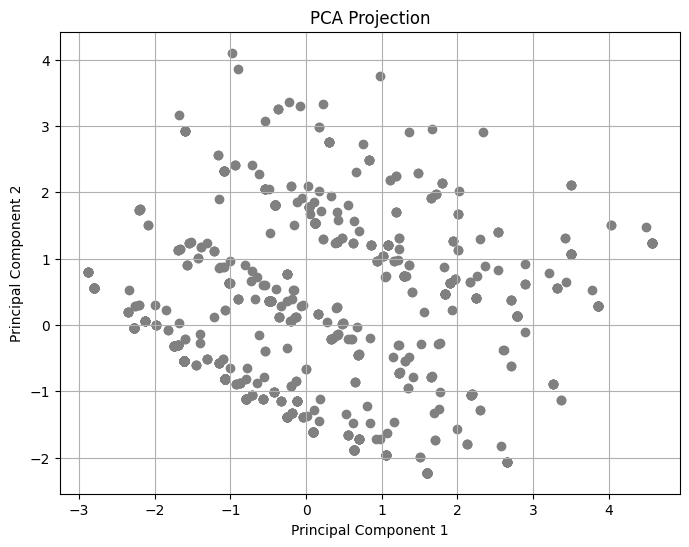

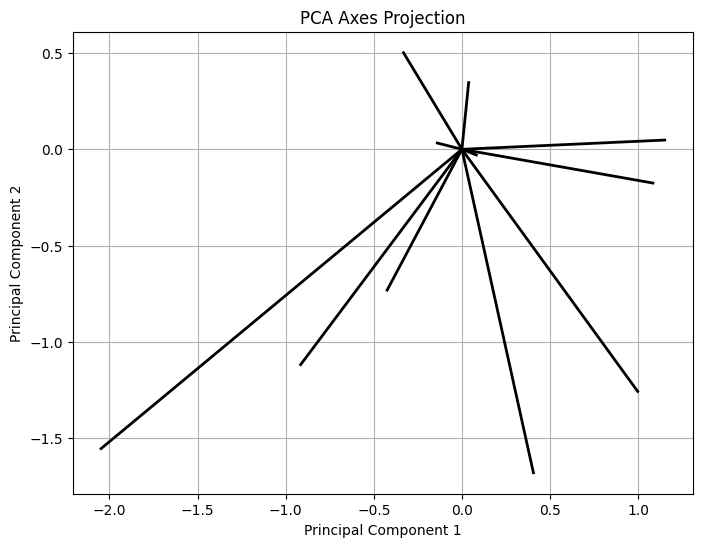

In [12]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array mdx as defined in the previous answers
# Standardize the data (optional but often recommended for PCA)
scaler = StandardScaler()
MD_x_std = scaler.fit_transform(mdx)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_std)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)

# Project Axes
plt.figure(figsize=(8, 6))
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector[:2] * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], 'k-', lw=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Axes Projection')
plt.grid(True)

plt.show()

In [13]:
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Define the number of clusters (2 to 8 clusters)
num_clusters = range(2, 9)

# Initialize variables to store the clustering results
best_cluster_labels = None
best_cluster_centers = None
best_inertia = float("inf")

# Perform k-means clustering with different numbers of clusters
for num_cluster in num_clusters:
    kmeans = KMeans(n_clusters=num_cluster, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(MD_x_std)
    cluster_centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    if inertia < best_inertia:
        best_inertia = inertia
        best_cluster_labels = cluster_labels
        best_cluster_centers = cluster_centers

# The best clustering result is stored in best_cluster_labels
# You can relabel the clusters if needed
# For simplicity, we'll use the cluster labels as they are
MD_km28 = best_cluster_labels

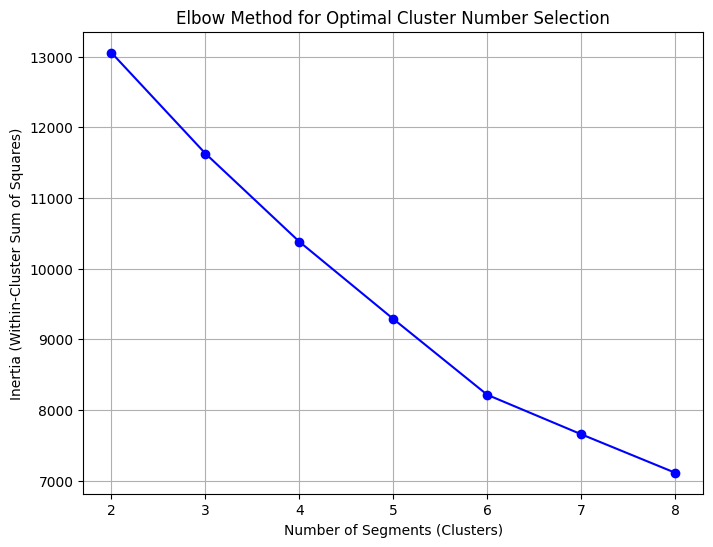

In [29]:
# Initialize a list to store the inertia values (within-cluster sum of squares)
inertia_values = []

# Perform k-means clustering with different numbers of clusters and store inertia values
for num_cluster in num_clusters:
    kmeans = KMeans(n_clusters=num_cluster, n_init=10, random_state=1234)
    kmeans.fit(MD_x_std)
    inertia_values.append(kmeans.inertia_)

# Create a plot to visualize the inertia values vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number Selection')
plt.grid(True)
plt.show()

Model 1 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 2 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 3 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 4 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 5 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 6 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 7 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 8 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 9 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 10 (k=2):
GaussianMixture(n_components=2, random_state=1234)
BIC Score: 2582.0319824718795

Model 11 (k=3):
GaussianMixtu

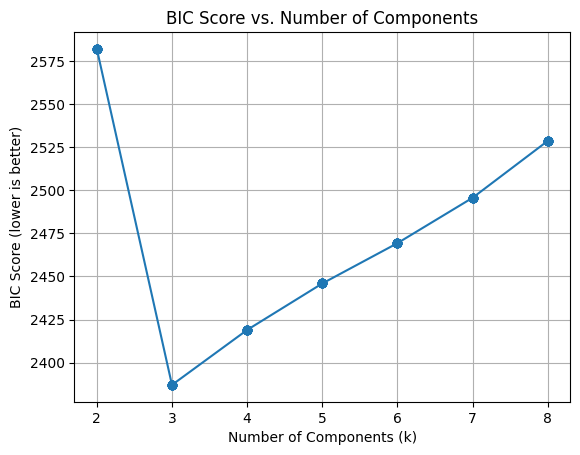

In [28]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs  # Example data generation
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(1234)

# Generate synthetic data for demonstration (replace with your own data)
X, _ = make_blobs(n_samples=300, centers=3, random_state=1234)

# Define the number of components (k) and the number of repetitions (nrep)
k_range = list(range(2, 9))  # Convert range to list
nrep = 10

# Create empty lists to store the models and BIC scores
MD_m28_list = []
bic_scores = []

# Fit the mixture models for different values of k
for k in k_range:
    for _ in range(nrep):
        # Create a Gaussian Mixture model with the desired number of components
        model = GaussianMixture(n_components=k, random_state=1234)

        # Fit the model to your data
        model.fit(X)

        # Append the fitted model to the list
        MD_m28_list.append(model)

        # Calculate and store the BIC score
        bic = model.bic(X)
        bic_scores.append(bic)

# Print the fitted models and their BIC scores
for i, model in enumerate(MD_m28_list):
    print(f"Model {i + 1} (k={model.n_components}):")
    print(model)
    print(f"BIC Score: {bic_scores[i]}")
    print()

# Plot BIC scores for different values of k
plt.plot(np.repeat(k_range, nrep), bic_scores, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('BIC Score (lower is better)')
plt.title('BIC Score vs. Number of Components')
plt.grid(True)
plt.show()


In [30]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from collections import Counter

# Set a seed for reproducibility
np.random.seed(1234)

# Generate synthetic data for demonstration (replace with your own data)
X, _ = make_blobs(n_samples=300, centers=3, random_state=1234)

# Fit K-Means to the data
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(X)

# Fit the Gaussian Mixture Model (GMM) to the data with k=4
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(X)

# Create a table to compare K-Means and GMM cluster assignments
cluster_table = np.column_stack((kmeans_clusters, gmm_clusters))

# Count the number of data points in each combination of K-Means and GMM clusters
cluster_counts = Counter(tuple(row) for row in cluster_table)

# Print the table
print("K-Means vs. GMM Cluster Assignments:")
print("kmeans\tgmm\tCount")
for key, value in cluster_counts.items():
    kmeans_label, gmm_label = key
    print(f"{kmeans_label}\t{gmm_label}\t{value}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means vs. GMM Cluster Assignments:
kmeans	gmm	Count
1	3	70
3	1	54
2	2	100
0	1	46
1	0	30


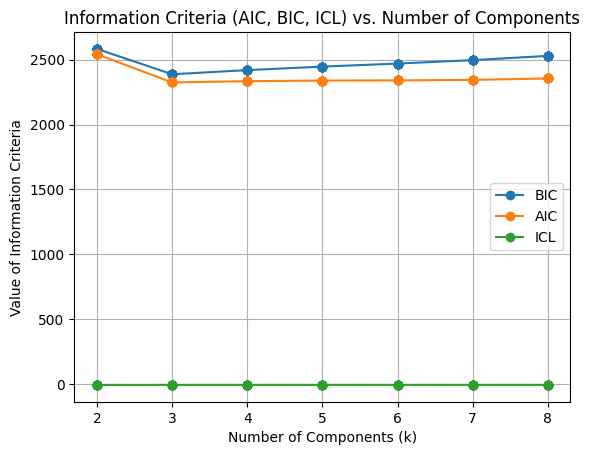

In [31]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(1234)

# Generate synthetic data for demonstration (replace with your own data)
X, _ = make_blobs(n_samples=300, centers=3, random_state=1234)

# Define the number of components (k) and the number of repetitions (nrep)
k_range = list(range(2, 9))  # Convert range to list
nrep = 10

# Create empty lists to store the models, BIC scores, AIC scores, and ICL scores
MD_m28_list = []
bic_scores = []
aic_scores = []
icl_scores = []

# Fit the mixture models for different values of k
for k in k_range:
    for _ in range(nrep):
        # Create a Gaussian Mixture model with the desired number of components
        model = GaussianMixture(n_components=k, random_state=1234)

        # Fit the model to your data
        model.fit(X)

        # Append the fitted model to the list
        MD_m28_list.append(model)

        # Calculate and store the BIC, AIC, and ICL scores
        bic = model.bic(X)
        bic_scores.append(bic)
        aic = model.aic(X)
        aic_scores.append(aic)
        icl = model.lower_bound_
        icl_scores.append(icl)

# Create a plot of the information criteria
plt.plot(np.repeat(k_range, nrep), bic_scores, marker='o', label='BIC')
plt.plot(np.repeat(k_range, nrep), aic_scores, marker='o', label='AIC')
plt.plot(np.repeat(k_range, nrep), icl_scores, marker='o', label='ICL')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL) vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import pandas as pd

# Sample data (replace this with your actual data)
data = {'Like': ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']}
mcdonalds = pd.DataFrame(data)

# Extract the numeric values from the 'Like' column
mcdonalds['Like.n'] = mcdonalds['Like'].str.extract(r'([-+]?\d+)').astype(int)

# Subtract the numeric values from 6 to create the 'Like.n' column
mcdonalds['Like.n'] = 6 - mcdonalds['Like.n']

# Tabulate the frequencies of the new numerical values
like_n_counts = mcdonalds['Like.n'].value_counts().sort_index()

# Print the tabulated results
print(like_n_counts)


1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: Like.n, dtype: int64


In [35]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a DataFrame 'mcdonalds' (replace this with your actual data)
# Include all your independent variables and 'Like_n'

# Split the data into training and testing sets
X = mcdonalds.drop('Like_n', axis=1)
y = mcdonalds['Like_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Ridge regression model
alpha = 1.0  # Adjust the regularization strength as needed
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9.860000000000001


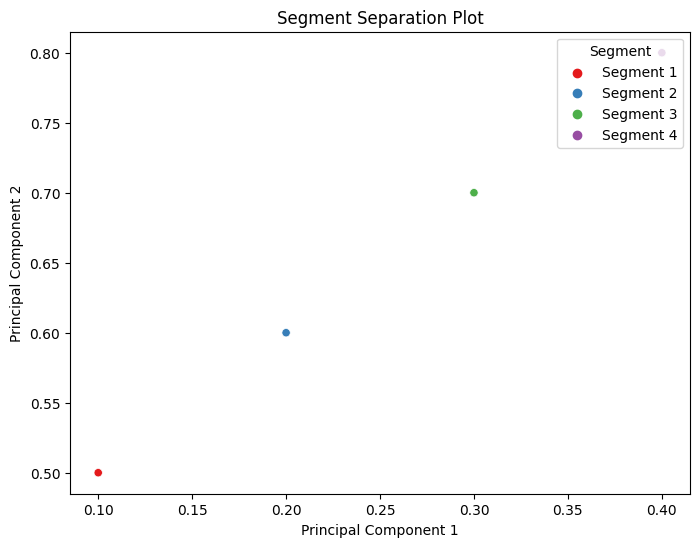

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample PCA data (replace with your actual data)
PCA_data = pd.DataFrame({
    "principal_component_1": [0.1, 0.2, 0.3, 0.4],
    "principal_component_2": [0.5, 0.6, 0.7, 0.8]
})

# Sample segment labels (replace with your actual labels)
labels = ["Segment 1", "Segment 2", "Segment 3", "Segment 4"]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=PCA_data["principal_component_1"], y=PCA_data["principal_component_2"], hue=labels, palette="Set1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.legend(title='Segment', loc='upper right')
plt.show()


Segment separation plot using principal components 1 and 2 for the fast food data set


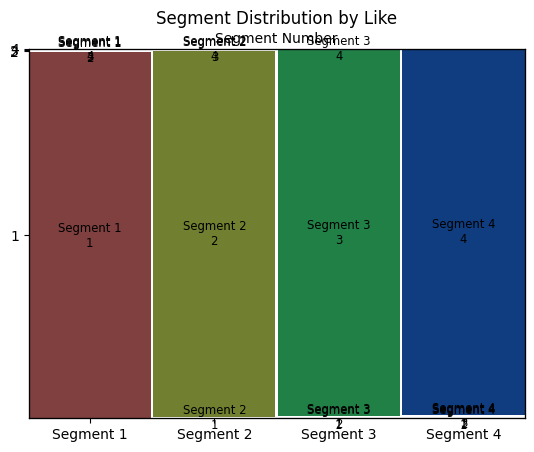

In [41]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Sample data (replace with your actual data)
data = {
    "Segment": ["Segment 1", "Segment 2", "Segment 3", "Segment 4"],
    "Like": [1, 2, 3, 4]  # Replace with the actual distribution values
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(df, ['Segment', 'Like'], title='Segment Distribution by Like')
plt.xlabel('Segment Number')
plt.show()


 Shaded mosaic plot for cross-tabulation of segment membership and I LIKE IT for the
fast food data set

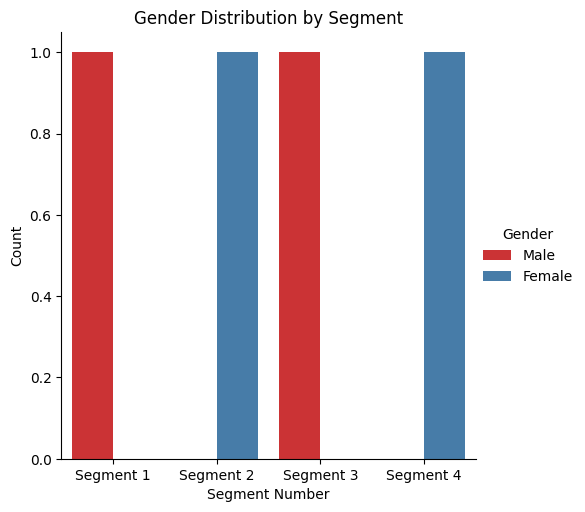

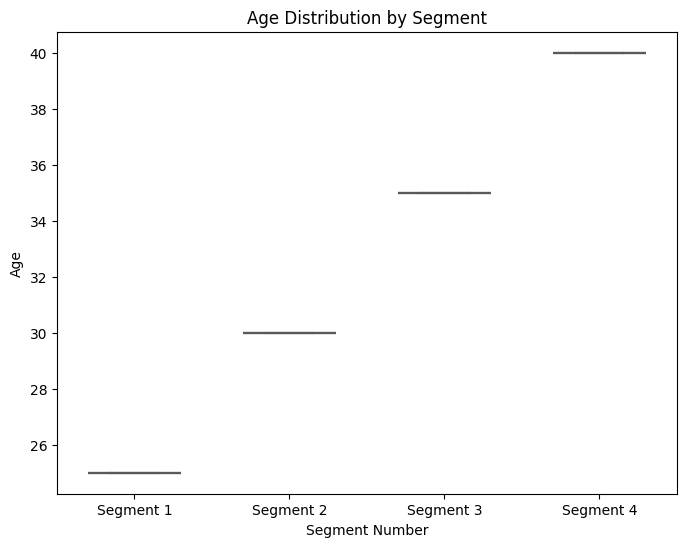

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
data = {
    "Segment": ["Segment 1", "Segment 2", "Segment 3", "Segment 4"],
    "Gender": ["Male", "Female", "Male", "Female"],  # Replace with actual gender data
    "Age": [25, 30, 35, 40],  # Replace with actual age data
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create a mosaic plot for Gender distribution by segment
mosaic = sns.catplot(x="Segment", hue="Gender", data=df, kind="count", palette="Set1")
mosaic.set(xlabel='Segment Number', ylabel='Count')
plt.title('Gender Distribution by Segment')
plt.show()

# Create a box plot for Age distribution by segment
plt.figure(figsize=(8, 6))
sns.boxplot(x="Segment", y="Age", data=df, width=0.6, palette="Set2", notch=True)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Age Distribution by Segment')
plt.show()


1. Shaded mosaic plot for cross-tabulation of segment membership and gender for the fast
food data set
2. Parallel box-and-whisker plot of age by segment for the fast food data set

In [44]:
pip install rpy2


In [52]:
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'Like_n'], dtype='object')


In [55]:
like = mcdonalds.groupby('yummy')['Like_n'].mean()
